# PCA + Logistic Regression (MNIST)

### Download and Load the Data

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [12]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [13]:
mnist.data.shape

(70000, 784)

In [14]:
mnist.target.shape

(70000,)

In [3]:
from sklearn.model_selection import train_test_split

In [19]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)

### Standardize the data 

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
#fit on training set only
scaler.fit(train_img)

/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
#apply transform to both the training and test sets
train_img_scaled = scaler.transform(train_img)
test_img_scaled = scaler.transform(test_img)

/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Apply PCA

In [8]:
from sklearn.decomposition import PCA
#make an instance of the model
pca = PCA(.95) #choose the minimum number of principal components such that 95% of the variance is retained

In [22]:
#fit PCA on training set only
pca.fit(train_img_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.n_components_

330

In [24]:
#apply the transform to both the training and test sets
train_img_pca = pca.transform(train_img_scaled)
test_img_pca = pca.transform(test_img_scaled)

In [29]:
#produce approximation of original image data from compressed PCA representation
lower_dim_data = pca.fit_transform(train_img)
approx_train = pca.inverse_transform(lower_dim_data)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

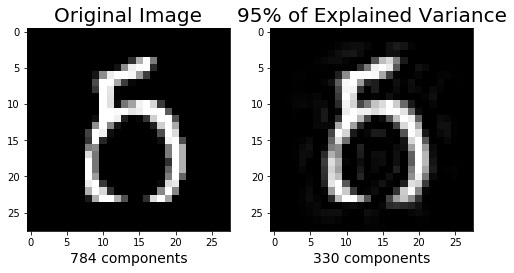

In [30]:
#plot original image and PCA-transformed approximation image
plt.figure(figsize=(8,4));

#original image
plt.subplot(1,2,1);
plt.imshow(train_img[1].reshape(28,28),
          cmap = plt.cm.gray, interpolation='nearest',
          clim=(0,225));
plt.xlabel('784 components', fontsize=14)
plt.title('Original Image', fontsize=20);

#from PCA-transformed approximation image
plt.subplot(1,2,2);
plt.imshow(approx_train[1].reshape(28,28),
          cmap = plt.cm.gray, interpolation='nearest',
          clim=(0,225));
plt.xlabel('330 components', fontsize=14)
plt.title('95% of Explained Variance', fontsize=20);

### Apply Logistic Regression to PCA-Transformed Data

In [31]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs')

In [32]:
logisticRegr.fit(train_img_pca, train_lbl)

/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sashakapralov/anaconda3/envs/py36_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
#predict for one observation (image)
logisticRegr.predict(test_img_pca[0].reshape(1,-1))

array([1.])

In [35]:
logisticRegr.score(test_img_pca,test_lbl)

0.9184285714285715

### Graph of Explained Variance vs Number of Principal Components

In [36]:
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.n_components_

154

In [39]:
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[10.255291448436694, 7.529273226907801, 6.470806727523762, 5.68567864253879, 5.144350878243914]


In [41]:
import numpy as np

In [42]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

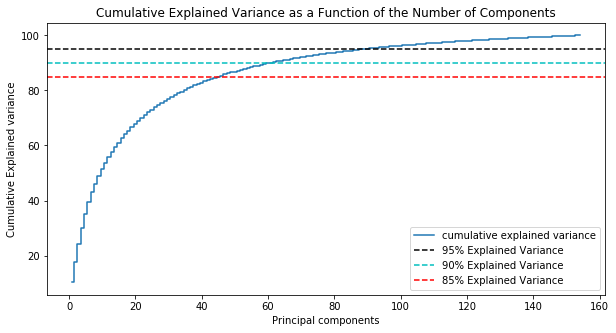

In [44]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 155), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()